<a href="https://colab.research.google.com/github/pdf-association/arlington-pdf-model/blob/master/Jupyter/Arlington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arlington PDF Model Jupyter Notebook

This Jupyter notebook demonstrates how the Arlington PDF Model can be combined into a monolithic TSV file suitable for use by pandas in a Jupyter Notebook. This notebook can run locally or in [Google Collab](https://colab.research.google.com/github/pdf-association/arlington-pdf-model/blob/master/Jupyter/Arlington.ipynb). The Python script `arlington-to-pandas.py` will convert an Arlington file set into a single monolithic TSV file by adding the object name as the first (left-most) field called "Object".

---
Copyright 2021-2025 PDF Association, Inc. https://www.pdfa.org

This material is based upon work supported by the Defense Advanced Research Projects Agency (DARPA) under Contract No. HR001119C0079. Any opinions, findings and conclusions or recommendations expressed in this material are those of the author(s) and do not necessarily reflect the views of the Defense Advanced Research Projects Agency (DARPA). Approved for public release.

---

In [2]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

If running inside Google Colab, then URL to `pandas.tsv` needs to be to the raw data (so use `https://github.com/pdf-association/arlington-pdf-model/raw/refs/heads/master/Jupyter/pandas.tsv`)

In [7]:
df = pd.read_csv('https://github.com/pdf-association/arlington-pdf-model/raw/refs/heads/master/Jupyter/pandas.tsv', delimiter='\t', na_filter=False,
                 dtype={'Object':'string', 'Key':'string', 'Type':'string',
                        'SinceVersion':'string', 'DeprecatedIn':'string', 'Required':'string',
                        'IndirectReference':'string', 'Inheritable':'string',
                        'DefaultValue':'string', 'PossibleValues':'string',
                        'SpecialCase':'string', 'Link':'string', 'Note':'string'})

The above two cells will have loaded the monolithic TSV into pandas as a Dataframe object. All fields are treated as strings to avoid NaN and other issues. This also matches how other Python scripts and the C++ PoC TestGrammar operate.

`df.info()` summarizes the CSV read information. Ensure the number of non-null counts is the same for all columns, and that all columns are of type `string`.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3710 entries, 0 to 3709
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Object             3710 non-null   string
 1   Key                3710 non-null   string
 2   Type               3710 non-null   string
 3   SinceVersion       3710 non-null   string
 4   DeprecatedIn       3710 non-null   string
 5   Required           3710 non-null   string
 6   IndirectReference  3710 non-null   string
 7   Inheritable        3710 non-null   string
 8   DefaultValue       3710 non-null   string
 9   PossibleValues     3710 non-null   string
 10  SpecialCase        3710 non-null   string
 11  Link               3710 non-null   string
 12  Note               3710 non-null   string
dtypes: string(13)
memory usage: 376.9 KB


We can also export the monolithic TSV data as JSON for other Python-based processing. More pre-processing could also be done (such as spliting each fields (columns) on SEMI-COLON):

In [13]:
# df.to_json('Arlington.json', orient="records", indent=4)

Here is what the data (as a Pandas `dataframe`) looks like:

In [9]:
df.head()

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
0,3DActivation,A,name,1.6,,FALSE,FALSE,FALSE,XA,"[PO,PV,XA]",,,Table 310
1,3DActivation,AIS,name,1.6,,FALSE,FALSE,FALSE,L,"[I,L]",,,
2,3DActivation,D,name,1.6,,FALSE,FALSE,FALSE,PI,"[PC,PI,XD]",,,
3,3DActivation,DIS,name,1.6,,FALSE,FALSE,FALSE,U,"[U,I,L]",,,
4,3DActivation,TB,boolean,1.7,,FALSE,FALSE,FALSE,true,,,,


In [10]:
df.tail()

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
3705,XRefStream,ID,array,1.5,,fn:IsRequired(fn:SinceVersion(2.0) || fn:IsPre...,fn:MustBeDirect(fn:IsPresent(Encrypt)),FALSE,,,,[TrailerIDArray],
3706,XRefStream,Encrypt,dictionary,1.5,,FALSE,FALSE,FALSE,,,,"[EncryptionStandard,EncryptionPublicKey]",
3707,XRefStream,AuthCode,dictionary,"fn:Extension(ISO_TS_32004,2.0)",,FALSE,fn:MustBeDirect(),FALSE,,,[fn:Eval(Encrypt::@V>=5)],[AuthCode],ISO/TS 32004 integrity protection
3708,_UniversalArray,*,array;boolean;dictionary;name;null;number;stre...,1.2,,FALSE,[FALSE];[FALSE];[FALSE];[FALSE];[FALSE];[FALSE...,FALSE,,,,[_UniversalArray];[];[_UniversalDictionary];[]...,
3709,_UniversalDictionary,*,array;boolean;dictionary;name;null;number;stre...,1.2,,FALSE,[FALSE];[FALSE];[FALSE];[FALSE];[FALSE];[FALSE...,FALSE,,,,[_UniversalArray];[];[_UniversalDictionary];[]...,


In [11]:
len(pd.unique(df['Object']))

548

This is the number of TSV files in the Arlington TSV data set and can be confirmed by `ls -1 | wc -1` in Linux.

So how many keys or array elements does Arlington define? This will be the number of rows in the Dataframe!

In [14]:
len(df)

3710

So this is the number of data rows in the full Arlington PDF model. It should also be equal to the sum of the line count of all TSV files less the number of files (since each TSV file has a header row). This can be confirmed in Linux by" `cat * | wc -l` and then subtracting the number of TSV files above.

In [15]:
df.dtypes

,0
Object,string[python]
Key,string[python]
Type,string[python]
SinceVersion,string[python]
DeprecatedIn,string[python]
Required,string[python]
IndirectReference,string[python]
Inheritable,string[python]
DefaultValue,string[python]
PossibleValues,string[python]


In [16]:
df.columns

Index(['Object', 'Key', 'Type', 'SinceVersion', 'DeprecatedIn', 'Required',
       'IndirectReference', 'Inheritable', 'DefaultValue', 'PossibleValues',
       'SpecialCase', 'Link', 'Note'],
      dtype='object')

The fields (columns) are easy to access:

In [17]:
df['Object']

,Object
0,3DActivation
1,3DActivation
2,3DActivation
3,3DActivation
4,3DActivation
...,...
3705,XRefStream
3706,XRefStream
3707,XRefStream
3708,_UniversalArray


In [18]:
df['Object'].unique()

<StringArray>
[            '3DActivation',         '3DAnimationStyle',
             '3DBackground',           '3DCrossSection',
         '3DLightingScheme',             '3DMeasure3DC',
             '3DMeasureAD3',             '3DMeasureLD3',
             '3DMeasurePD3',             '3DMeasureRD3',
 ...
 'XObjectFormPSpassthrough',       'XObjectFormTrapNet',
         'XObjectFormType1',             'XObjectImage',
         'XObjectImageMask',     'XObjectImageSoftMask',
               'XObjectMap',               'XRefStream',
          '_UniversalArray',     '_UniversalDictionary']
Length: 548, dtype: string

In [20]:
df['Type'].str.split(';')

,Type
0,[name]
1,[name]
2,[name]
3,[name]
4,[boolean]
...,...
3705,[array]
3706,[dictionary]
3707,[dictionary]
3708,"[array, boolean, dictionary, name, null, numbe..."


Using Datafield query method we can create some simple filters over the data:

In [21]:
df.query('Key == "Subtype"')

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
10,3DAnimationStyle,Subtype,name,1.7,,FALSE,FALSE,FALSE,None,"[None,Linear,Oscillating]",,,Table 313
14,3DBackground,Subtype,name,1.6,,FALSE,FALSE,FALSE,SC,[SC],,,
29,3DLightingScheme,Subtype,name,1.7,,TRUE,FALSE,FALSE,,"[Artwork,None,White,Day,Night,Hard,Primary,Blu...",,,Table 321
31,3DMeasure3DC,Subtype,name,"fn:Eval(fn:Extension(ADBE_Extn3,1.7) || 2.0)",,TRUE,FALSE,FALSE,,[3DC],,,
42,3DMeasureAD3,Subtype,name,"fn:Eval(fn:Extension(ADBE_Extn3,1.7) || 2.0)",,TRUE,FALSE,FALSE,,[AD3],,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,XObjectFormTrapNet,Subtype,name,1.3,2.0,TRUE,FALSE,FALSE,,[Form],,,
3578,XObjectFormType1,Subtype,name,1.0,,TRUE,FALSE,FALSE,,[Form],,,
3609,XObjectImage,Subtype,name,1.0,,TRUE,FALSE,FALSE,,[Image],,,
3643,XObjectImageMask,Subtype,name,1.3,,TRUE,FALSE,FALSE,,[Image],,,


In [22]:
df.query('("string-ascii" in Type) and (Required == "TRUE")')

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
312,ActionURI,URI,string-ascii,1.1,,TRUE,FALSE,FALSE,,,,,
1307,ArrayOfTags,1*,string-ascii,1.2,2.0,TRUE,FALSE,FALSE,,,,,
1526,CIDSystemInfo,Registry,string-ascii,1.2,,TRUE,FALSE,FALSE,,,,,Table 114
1527,CIDSystemInfo,Ordering,string-ascii,1.2,,TRUE,FALSE,FALSE,,,,,
3251,SoftwareIdentifier,U,string-ascii,1.5,,TRUE,FALSE,FALSE,,,,,
3395,TimeStampDict,URL,string-ascii,1.6,,TRUE,FALSE,FALSE,,,,,"Table 237, TimeStamp cell"
3410,URLAlias,U,string-ascii,1.3,,TRUE,FALSE,FALSE,,,,,Table 392
3465,WebCaptureCommand,URL,string-ascii,1.3,,TRUE,FALSE,FALSE,,,,,Table 393


Not many fields are purely numeric. We can get a simple histogram to get a feel of how many new keys were introduced in each PDF version by filtering the "SinceVersion" field down to just "1.x" and "2.x":

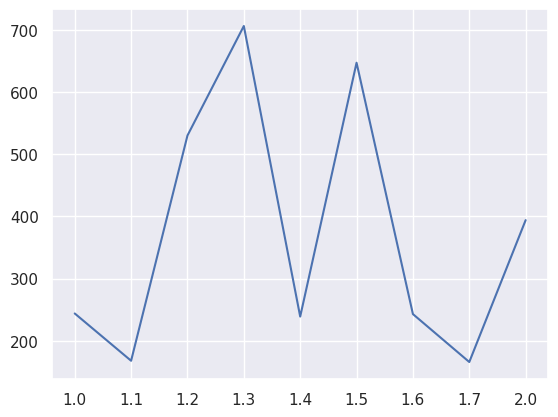

In [23]:
since_ver = pd.DataFrame(df['SinceVersion'].value_counts())
pdf_versions = [ "1.0", "1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", "2.0" ]
since_ver = since_ver.loc[pdf_versions]
a = plt.plot(pdf_versions, since_ver)

Let's try and identify this mysterious PDF object:
```
52 0 obj
<</R[146 522 153 542]/N 53 0 R/P 51 0 R/T 570 0
R/V 53 0 R>>
endobj
53 0 obj
<</R[352 570 359 590]/N 52 0 R/P 51 0 R/T 570 0
R/V 52 0 R>>
endobj
```
Lets make small Dataframes for each key we are interested in and limit the output to just the Object, Key and Type:

In [24]:
n_key = df.loc[df['Key']=="N", ['Object', 'Key', 'Type']]
p_key = df.loc[df['Key']=="P", ['Object', 'Key', 'Type']]
t_key = df.loc[df['Key']=="T", ['Object', 'Key', 'Type']]
r_key = df.loc[df['Key']=="R", ['Object', 'Key', 'Type']]

Now we can do inner-merge to intersect the sets with each other

In [25]:
df1 = pd.merge(n_key, p_key, how ='inner', on =['Object'])
df2 = pd.merge(t_key, r_key, how ='inner', on =['Object'])
pd.merge(df1, df2, how ='inner', on =['Object'])

,Object,Key_x_x,Type_x_x,Key_y_x,Type_y_x,Key_x_y,Type_x_y,Key_y_y,Type_y_y
0,Bead,N,dictionary,P,dictionary,T,dictionary,R,rectangle
1,BeadFirst,N,dictionary,P,dictionary,T,dictionary,R,rectangle
2,Target,N,string-byte,P,integer;string-byte,T,dictionary,R,name


From this result we can see that only Bead and BeadFirst objects have an R key which is an array (specifically, a rectangle in the Arlington predefined types). The Target R key needs to be a PDF name which the fragment is clearly not.
So the answer is that it is a Bead/BeadFirst dictionary!

Let's now investigate inheritable-ness...

In [26]:
inheritable_keys = df.loc[df['Inheritable']=="TRUE", ['Object', 'Key', 'Type', 'Required', 'Inheritable', 'DefaultValue']]
len(inheritable_keys)

67

In [27]:
inheritable_keys

,Object,Key,Type,Required,Inheritable,DefaultValue
1799,FieldBtnCheckbox,FT,name,TRUE,TRUE,
1805,FieldBtnCheckbox,Ff,bitmask,FALSE,TRUE,
1807,FieldBtnCheckbox,DA,string,TRUE,TRUE,
1811,FieldBtnCheckbox,Opt,array,FALSE,TRUE,
1812,FieldBtnCheckbox,V,name,FALSE,TRUE,
...,...,...,...,...,...,...
3343,StructureAttributesDict,TextDecorationType,name,FALSE,TRUE,None
3344,StructureAttributesDict,RubyAlign,name,FALSE,TRUE,Distribute
3345,StructureAttributesDict,RubyPosition,name,FALSE,TRUE,Before
3346,StructureAttributesDict,GlyphOrientationVertical,integer;name,FALSE,TRUE,[];[Auto]


So there are a total of 67 keys defined to have inheritance (of some kind) in PDF 2.0 (as defined by ISO 32000-2:2020).

Let's narrow to required keys that also inheritable:

In [28]:
inheritable_and_required_keys = inheritable_keys.loc[inheritable_keys['Required']=="TRUE"]
inheritable_and_required_keys

,Object,Key,Type,Required,Inheritable,DefaultValue
1799,FieldBtnCheckbox,FT,name,TRUE,TRUE,
1807,FieldBtnCheckbox,DA,string,TRUE,TRUE,
1814,FieldBtnPush,FT,name,TRUE,TRUE,
1822,FieldBtnPush,DA,string,TRUE,TRUE,
1828,FieldBtnRadio,FT,name,TRUE,TRUE,
1836,FieldBtnRadio,DA,string,TRUE,TRUE,
1843,FieldChoice,FT,name,TRUE,TRUE,
1853,FieldChoice,DA,string,TRUE,TRUE,
1864,FieldSig,FT,name,TRUE,TRUE,
1880,FieldTx,FT,name,TRUE,TRUE,


Everyone thinks that there are more required and inheritable keys in the PageObject...

In [29]:
inheritable_keys.query('Object=="PageObject"')

,Object,Key,Type,Required,Inheritable,DefaultValue
2708,PageObject,Resources,dictionary,TRUE,TRUE,
2709,PageObject,MediaBox,rectangle,TRUE,TRUE,
2710,PageObject,CropBox,rectangle,FALSE,TRUE,@MediaBox
2716,PageObject,Rotate,integer,FALSE,TRUE,0
2738,PageObject,Hid,boolean,FALSE,TRUE,false


What is this "Hid" key?? That's not in ISO 32000-1 or ISO 32000-2!
Let's get the full data for that key:

In [30]:
df.query('Object=="PageObject" and Key=="Hid"')

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
2738,PageObject,Hid,boolean,1.1,1.3,FALSE,FALSE,TRUE,false,,,,


And what about all the other ...Box keys?

In [31]:
page_obj = df.query('Object=="PageObject"')
page_obj[page_obj.Key.str.contains("Box")]

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
2709,PageObject,MediaBox,rectangle,1.0,,TRUE,FALSE,TRUE,,,,,Inheritable from Parent
2710,PageObject,CropBox,rectangle,1.0,,FALSE,FALSE,TRUE,@MediaBox,,,,Inheritable from Parent
2711,PageObject,BleedBox,rectangle,1.3,,FALSE,FALSE,FALSE,@CropBox,,,,Inheritable from Parent
2712,PageObject,TrimBox,rectangle,1.3,,FALSE,FALSE,FALSE,@CropBox,,,,
2713,PageObject,ArtBox,rectangle,1.3,,FALSE,FALSE,FALSE,@CropBox,,,,
2714,PageObject,BoxColorInfo,dictionary,1.4,,FALSE,FALSE,FALSE,,,,[BoxColorInfo],
